In [1]:
import numpy as np
from sklearn.decomposition import PCA

# Create a random 100x10 matrix
np.random.seed(0)  # For reproducibility
T = 5051
S = 48

Test = 1574

random_matrix = np.random.rand(T, S)
new_data = np.random.rand(Test, S)

In [2]:
# Step 2: Standardize the data (recommended)
mean = np.mean(random_matrix, axis=0)
std_dev = np.std(random_matrix, axis=0)
standardized_matrix = (random_matrix - mean) / std_dev

In [3]:
# Step 3: Perform PCA
pca = PCA()

In [4]:
# Step 4: Choose the number of principal components to retain
# You can specify the number of components using pca = PCA(n_components=k)
# where k is the desired number of components.
# For now, we'll use all components.
k = 48

pca.fit(standardized_matrix)

PCA()

In [5]:
explained_variance = pca.explained_variance_ratio_

In [6]:
explained_variance.shape

(48,)

In [7]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

In [8]:
cumulative_variance

array([0.02455641, 0.0490123 , 0.07317672, 0.09701689, 0.12069687,
       0.14423666, 0.1676726 , 0.19091866, 0.2139488 , 0.23672595,
       0.25943307, 0.28190849, 0.30422158, 0.3263162 , 0.34824584,
       0.37004661, 0.3917485 , 0.41334787, 0.4347778 , 0.45612531,
       0.47726327, 0.49822134, 0.5190332 , 0.53983197, 0.56054664,
       0.58115129, 0.60168142, 0.62210205, 0.64233634, 0.66250077,
       0.6825923 , 0.70252657, 0.72217342, 0.74170681, 0.76120979,
       0.7805552 , 0.79965589, 0.81860527, 0.83743667, 0.85613983,
       0.87465574, 0.89290948, 0.91104488, 0.92909573, 0.94709315,
       0.9648775 , 0.98259972, 1.        ])

In [9]:
# Decreasing selected_variance to 0.58 to maintain 58% explained variance.
# Originally, we used 90% variance, which captured all the important components,
# but now we are choosing 58% variance to retain 26 selected components.
selected_variance = 0.58
num_components_for_selected_varience = np.argmax(cumulative_variance >= selected_variance) + 1
num_components_for_selected_varience

26

In [10]:
selected_components = pca.components_[:num_components_for_selected_varience, :]

In [11]:
selected_components.shape

(26, 48)

In [12]:
# (6625 x 48 ) @ (48 x 26)
reduced_data = np.dot(standardized_matrix, selected_components.T)

In [13]:
reduced_data.shape

(5051, 26)

In [14]:
## Pre Processing of the new Data

In [15]:
new_data.shape

(1574, 48)

In [16]:
# Standerdized the new data according to old mean and varience
standardized_new = (new_data - mean) / std_dev

In [17]:
standardized_new.shape

(1574, 48)

In [18]:
reduced_new_data = np.dot(standardized_new, selected_components.T)

In [19]:
reduced_new_data.shape

(1574, 26)

In [20]:

reduced_data.shape


(5051, 26)

In [21]:
data = reduced_data

In [22]:
data.shape

(5051, 26)

In [23]:
# Clustring Analysis

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [25]:
# Create a list to store silhouette scores for each value of k
silhouette_scores = []

# Define the range of k values
k_values = range(2, 7)

# Loop through each value of k and perform K-means clustering
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init =100,random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    # Calculate the silhouette score for this clustering
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
k_values = [0] + list(k_values)
silhouette_scores = [0] + silhouette_scores

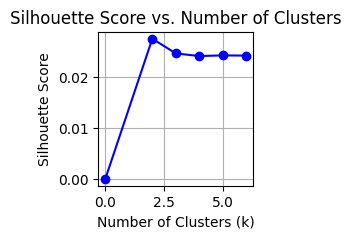

In [26]:
# Plot the silhouette scores for different values of k
plt.figure(figsize=(2, 2))

plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()


In [27]:
# Print the silhouette scores for each k
for k, score in zip(k_values, silhouette_scores):
    print(f"For k={k}, Silhouette Score: {score}")

For k=0, Silhouette Score: 0
For k=2, Silhouette Score: 0.027456834163542318
For k=3, Silhouette Score: 0.02457411194103756
For k=4, Silhouette Score: 0.024059936894548953
For k=5, Silhouette Score: 0.02418781319827374
For k=6, Silhouette Score: 0.02414559662870383


In [28]:
kmeans = KMeans(n_clusters=2, random_state=0,n_init =100)
cluster_labels = kmeans.fit_predict(data)

In [29]:
cluster_labels

array([1, 0, 1, ..., 0, 1, 1], dtype=int32)

In [30]:
data.shape

(5051, 26)

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [32]:
X = data  # Shape (5051, 26)
y = cluster_labels  # Shape (5051,)

# Create and train the LDA classifier
lda = LinearDiscriminantAnalysis()
# Define evaluation metrics
scoring = {
    'AUC': make_scorer(roc_auc_score),
    'Accuracy': make_scorer(accuracy_score),
    'F1 Score': make_scorer(f1_score),
}

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for metric_name, scorer in scoring.items():
    scores = cross_val_score(lda, X, y, cv=kf, scoring=scorer)
    print(f"{metric_name} Mean: {np.mean(scores):.4f}, Std: {np.std(scores):.4f}")

AUC Mean: 0.9901, Std: 0.0052
Accuracy Mean: 0.9901, Std: 0.0052
F1 Score Mean: 0.9901, Std: 0.0052


In [33]:
qda = QuadraticDiscriminantAnalysis()

# Define evaluation metrics
scoring = {
    'AUC': make_scorer(roc_auc_score),
    'Accuracy': make_scorer(accuracy_score),
    'F1 Score': make_scorer(f1_score),
}

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for metric_name, scorer in scoring.items():
    scores = cross_val_score(qda, X, y, cv=kf, scoring=scorer)
    print(f"{metric_name} Mean: {np.mean(scores):.4f}, Std: {np.std(scores):.4f}")


AUC Mean: 0.9700, Std: 0.0061
Accuracy Mean: 0.9699, Std: 0.0061
F1 Score Mean: 0.9700, Std: 0.0061


In [34]:
# Create a Logistic Regression classifier
logistic_reg = LogisticRegression()

# Define evaluation metrics
scoring = {
    'AUC': make_scorer(roc_auc_score),
    'Accuracy': make_scorer(accuracy_score),
    'F1 Score': make_scorer(f1_score),
}

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for metric_name, scorer in scoring.items():
    scores = cross_val_score(logistic_reg, X, y, cv=kf, scoring=scorer)
    print(f"{metric_name} Mean: {np.mean(scores):.4f}, Std: {np.std(scores):.4f}")

AUC Mean: 0.9962, Std: 0.0027
Accuracy Mean: 0.9962, Std: 0.0027
F1 Score Mean: 0.9962, Std: 0.0027


In [35]:
!pwd

/Users/aman.meena/Documents/fint


In [36]:
decision_tree = DecisionTreeClassifier()

# Define evaluation metrics
scoring = {
    'AUC': make_scorer(roc_auc_score),
    'Accuracy': make_scorer(accuracy_score),
    'F1 Score': make_scorer(f1_score),
}

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for metric_name, scorer in scoring.items():
    scores = cross_val_score(decision_tree, X, y, cv=kf, scoring=scorer)
    print(f"{metric_name} Mean: {np.mean(scores):.4f}, Std: {np.std(scores):.4f}")


AUC Mean: 0.8400, Std: 0.0112
Accuracy Mean: 0.8422, Std: 0.0114
F1 Score Mean: 0.8441, Std: 0.0105


In [37]:
base_classifier = DecisionTreeClassifier()  # You can choose a different base classifier if needed
adaboost_classifier = AdaBoostClassifier(base_classifier)

# Define evaluation metrics
scoring = {
    'AUC': make_scorer(roc_auc_score),
    'Accuracy': make_scorer(accuracy_score),
    'F1 Score': make_scorer(f1_score),
}

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for metric_name, scorer in scoring.items():
    scores = cross_val_score(adaboost_classifier, X, y, cv=kf, scoring=scorer)
    print(f"{metric_name} Mean: {np.mean(scores):.4f}, Std: {np.std(scores):.4f}")


AUC Mean: 0.8386, Std: 0.0095
Accuracy Mean: 0.8408, Std: 0.0150
F1 Score Mean: 0.8414, Std: 0.0166


In [38]:
naive_bayes = GaussianNB()

# Define evaluation metrics
scoring = {
    'AUC': make_scorer(roc_auc_score),
    'Accuracy': make_scorer(accuracy_score),
    'F1 Score': make_scorer(f1_score),
}

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for metric_name, scorer in scoring.items():
    scores = cross_val_score(naive_bayes, X, y, cv=kf, scoring=scorer)
    print(f"{metric_name} Mean: {np.mean(scores):.4f}, Std: {np.std(scores):.4f}")


AUC Mean: 0.9574, Std: 0.0070
Accuracy Mean: 0.9574, Std: 0.0070
F1 Score Mean: 0.9575, Std: 0.0074


In [39]:
reduced_new_data

array([[-0.29234724, -2.07414455, -0.33580672, ..., -0.13012279,
        -0.02957552, -0.89849891],
       [ 0.98301245, -0.36556327,  0.35753026, ..., -2.65578397,
        -0.46441329, -0.0048024 ],
       [ 1.31694539, -0.79977153, -1.19057439, ..., -0.04351192,
        -0.99326073, -0.3717693 ],
       ...,
       [ 1.94440141, -0.35340737, -0.19986285, ..., -0.86338459,
         0.68520993,  0.98047295],
       [ 0.35315766, -1.11940442, -0.75323326, ..., -0.05597727,
         1.41824268, -1.58548788],
       [-2.10139333,  0.82313595, -0.96049059, ...,  0.21271179,
         0.03584481,  0.0432065 ]])